Importing all the modules. Some may not be needed as of now. 

In [209]:
# modules - probably too many
import numpy as np
import pandas as pd
import pickle
import matplotlib
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import neighbors
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.colors as colors
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
import math
import seaborn as sns
import multiprocessing
import numpy.matlib as npm
import geeadd
import ee
import mlLocal
from importlib import reload

## Data Exploration

Reading in all calibration data.

In [2]:
dfALL = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATall.pkl')
dfALLtrim = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATalltrim.pkl')
dfALLtrimKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATalltrimKANG.pkl')

Maps of Sample for each dataset

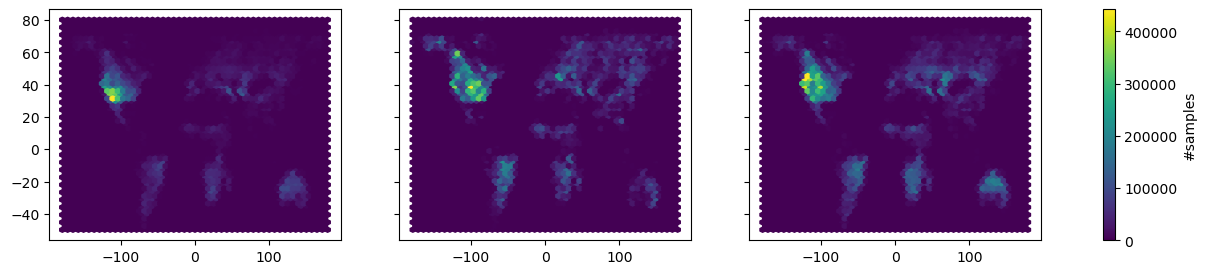

In [3]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,3), sharex=True, sharey=True)
cmap=cm.get_cmap('viridis')
hb = ax[0].hexbin(dfALL['Lon'],dfALL['Lat'], gridsize=(50),cmap=cmap)
hb = ax[1].hexbin(dfALLtrim['Lon'],dfALLtrim['Lat'], gridsize=(50),cmap=cmap)
hb = ax[2].hexbin(dfALLtrimKANG['Lon'], dfALLtrimKANG['Lat'], gridsize=(50),cmap=cmap)
# ax.set_title("Calibration Samples")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('#samples')
#plt.savefig('Figure1.png', bbox_inches='tight')
plt.show()

In [4]:
# Validation data for LAI and FAPAR
valbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictLAI.pkl')
valbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictFAPAR.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAI.pkl')
calbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPAR.pkl')

# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPARKANG.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

Maps of Sample for each LC_Type

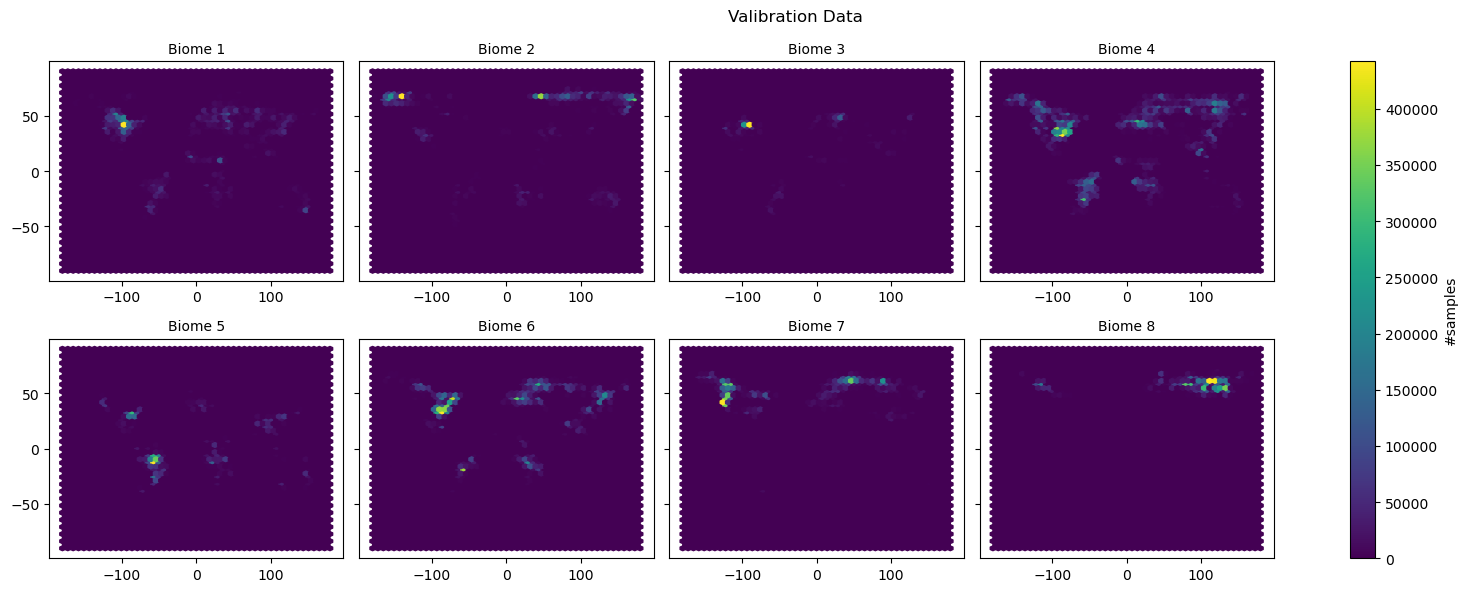

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(valbiomeDictLAI[1]['DF']['Lon'], valbiomeDictLAI[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(valbiomeDictLAI[2]['DF']['Lon'], valbiomeDictLAI[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(valbiomeDictLAI[3]['DF']['Lon'], valbiomeDictLAI[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(valbiomeDictLAI[4]['DF']['Lon'], valbiomeDictLAI[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(valbiomeDictLAI[5]['DF']['Lon'], valbiomeDictLAI[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(valbiomeDictLAI[6]['DF']['Lon'], valbiomeDictLAI[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(valbiomeDictLAI[7]['DF']['Lon'], valbiomeDictLAI[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][3].hexbin(valbiomeDictLAI[8]['DF']['Lon'], valbiomeDictLAI[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('Valibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

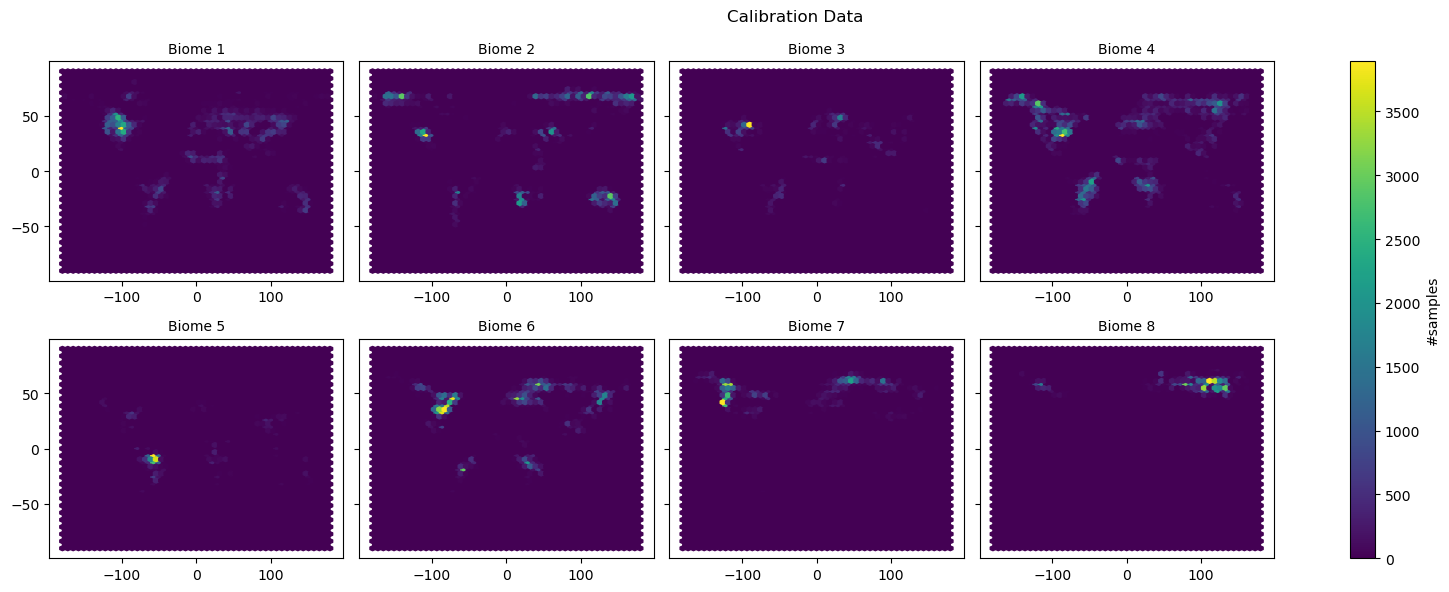

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(calbiomeDictLAI[1]['DF']['Lon'], calbiomeDictLAI[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(calbiomeDictLAI[2]['DF']['Lon'], calbiomeDictLAI[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(calbiomeDictLAI[3]['DF']['Lon'], calbiomeDictLAI[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(calbiomeDictLAI[4]['DF']['Lon'], calbiomeDictLAI[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(calbiomeDictLAI[5]['DF']['Lon'], calbiomeDictLAI[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(calbiomeDictLAI[6]['DF']['Lon'], calbiomeDictLAI[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(calbiomeDictLAI[7]['DF']['Lon'], calbiomeDictLAI[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
hb = axes[1][3].hexbin(calbiomeDictLAI[8]['DF']['Lon'], calbiomeDictLAI[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('Calibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

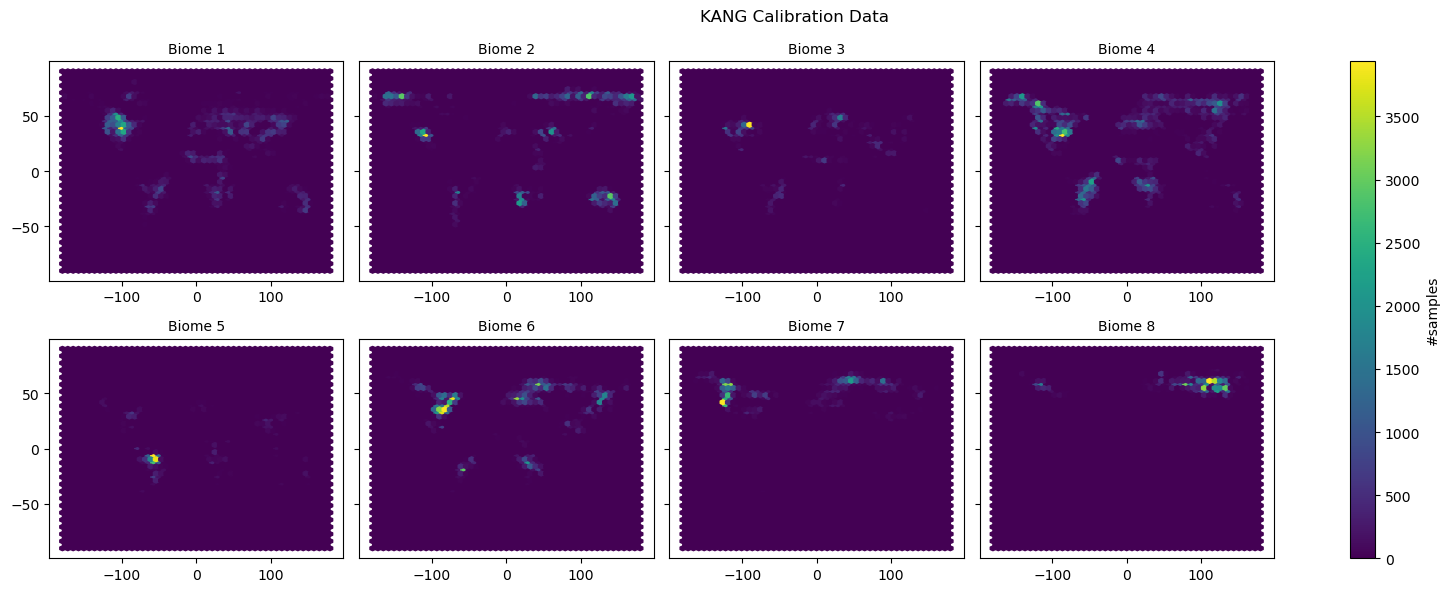

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(calbiomeDictLAIKANG[1]['DF']['Lon'], calbiomeDictLAIKANG[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(calbiomeDictLAIKANG[2]['DF']['Lon'], calbiomeDictLAIKANG[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(calbiomeDictLAIKANG[3]['DF']['Lon'], calbiomeDictLAIKANG[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(calbiomeDictLAIKANG[4]['DF']['Lon'], calbiomeDictLAIKANG[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(calbiomeDictLAIKANG[5]['DF']['Lon'], calbiomeDictLAIKANG[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(calbiomeDictLAIKANG[6]['DF']['Lon'], calbiomeDictLAIKANG[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(calbiomeDictLAIKANG[7]['DF']['Lon'], calbiomeDictLAIKANG[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
hb = axes[1][3].hexbin(calbiomeDictLAIKANG[8]['DF']['Lon'], calbiomeDictLAIKANG[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('KANG Calibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

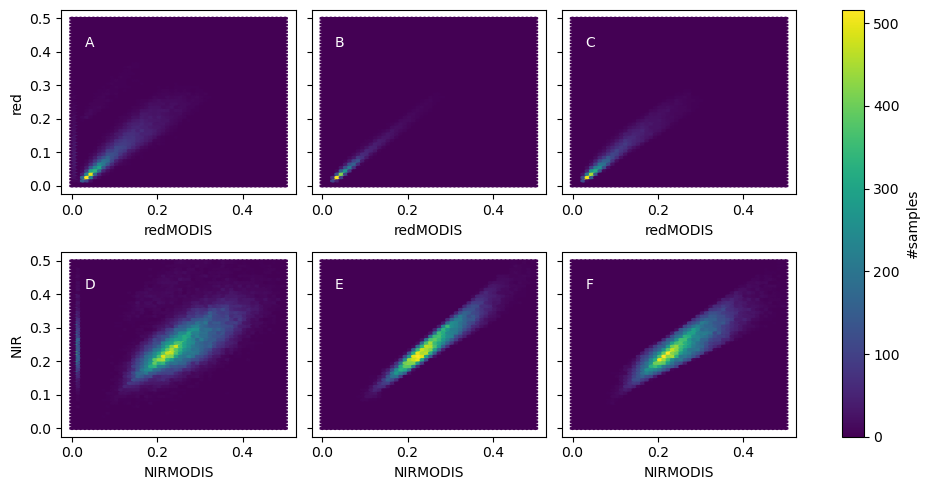

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,figsize=(10,5))
dfA = dfALL.sample(100000) / 10000
axs[0,0].hexbin(dfA['redMODIS'],dfA['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,0].set(xlabel='redMODIS', ylabel='red')
axs[1,0].hexbin(dfA['NIRMODIS'],dfA['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,0].set(xlabel='NIRMODIS', ylabel='NIR')

dfT = dfALLtrim.sample(100000) / 10000
axs[0,1].hexbin(dfT['redMODIS'],dfT['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,1].set(xlabel='redMODIS')
hb=axs[1,1].hexbin(dfT['NIRMODIS'],dfT['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,1].set(xlabel='NIRMODIS')

dfK = dfALLtrimKANG.sample(100000) / 10000
axs[0,2].hexbin(dfK['redMODIS'],dfK['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,2].set(xlabel='redMODIS')
hb=axs[1,2].hexbin(dfK['NIRMODIS'],dfK['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,2].set(xlabel='NIRMODIS')

#Add colorbar
fig.tight_layout()
cb = fig.colorbar(hb, ax=axs)
cb.set_label('#samples')

#Add labels
axs[0,0].text(0.1, 0.8, 'A', size=10, color='white', transform=axs[0,0].transAxes)
axs[1,0].text(0.1, 0.8, 'D', size=10, color='white', transform=axs[1,0].transAxes)
axs[0,1].text(0.1, 0.8, 'B', size=10, color='white', transform=axs[0,1].transAxes)
axs[1,1].text(0.1, 0.8, 'E', size=10, color='white', transform=axs[1,1].transAxes)
axs[0,2].text(0.1, 0.8, 'C', size=10, color='white', transform=axs[0,2].transAxes)
axs[1,2].text(0.1, 0.8, 'F', size=10, color='white', transform=axs[1,2].transAxes)

plt.show()

Pairplots of sampled respose values by biome

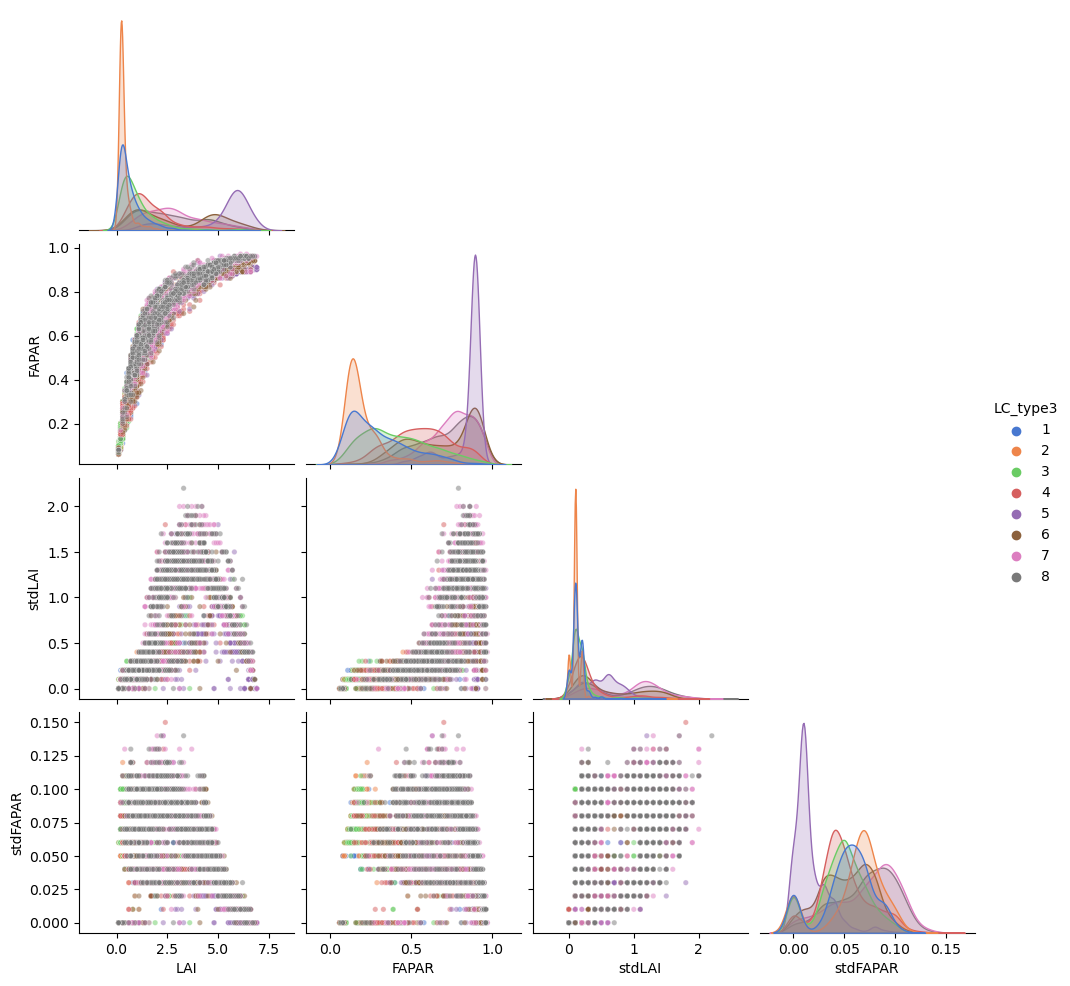

In [9]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALL.loc[dfALL['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

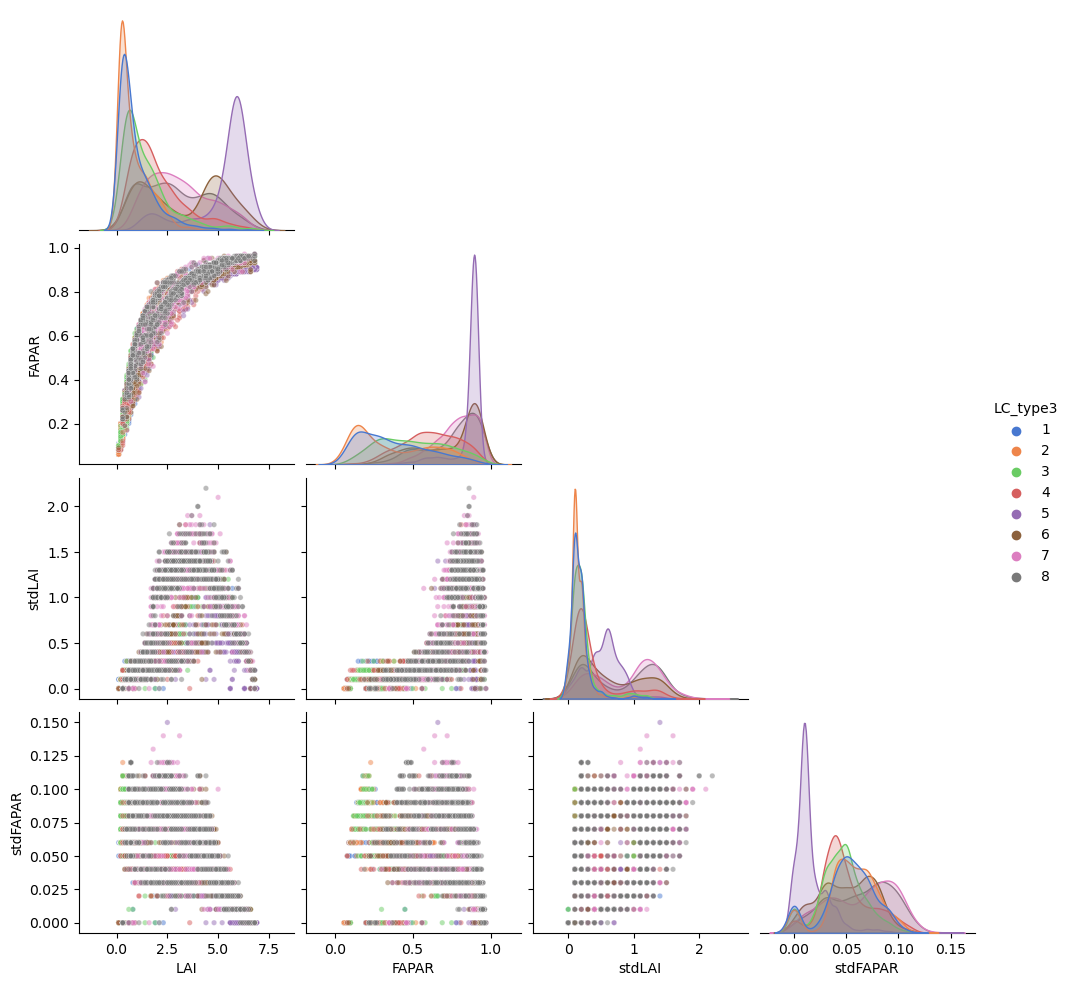

In [10]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALLtrim.loc[dfALLtrim['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

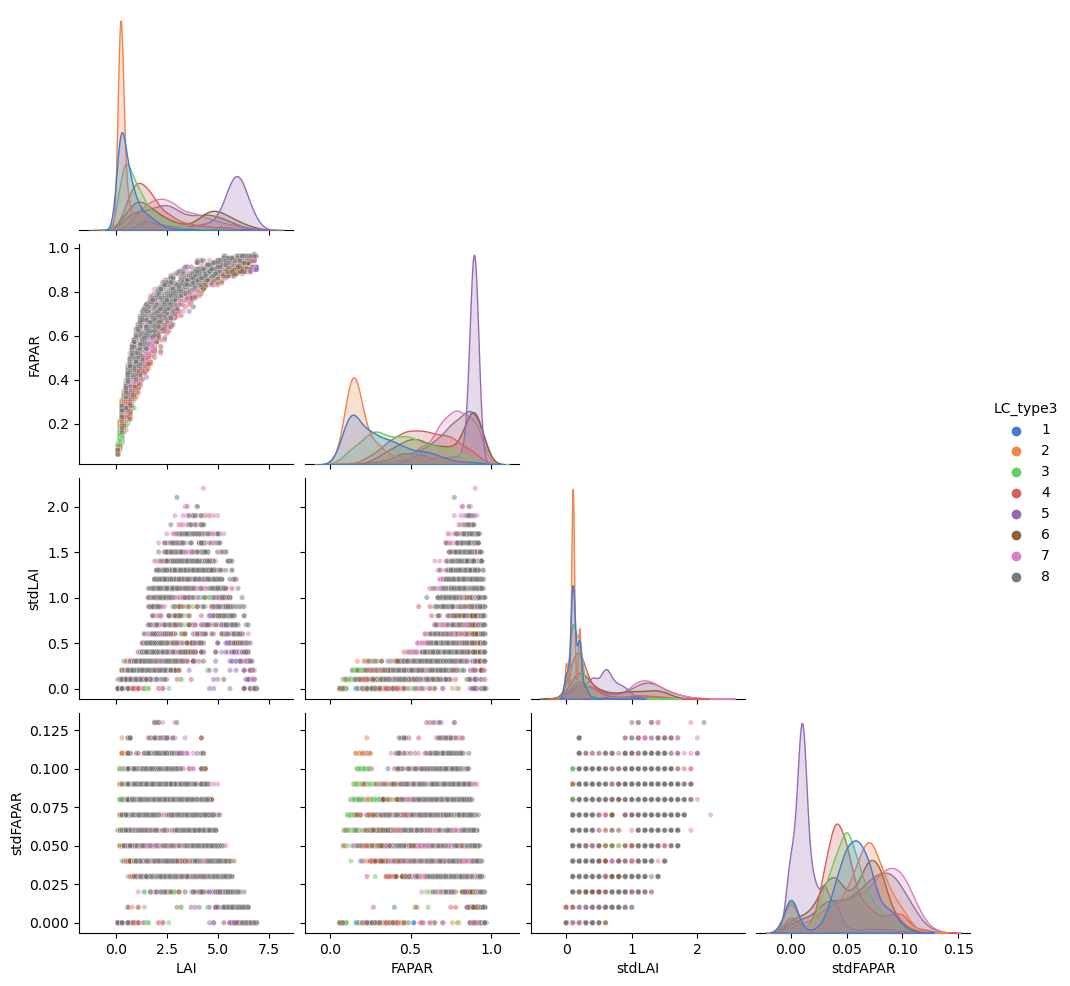

In [11]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

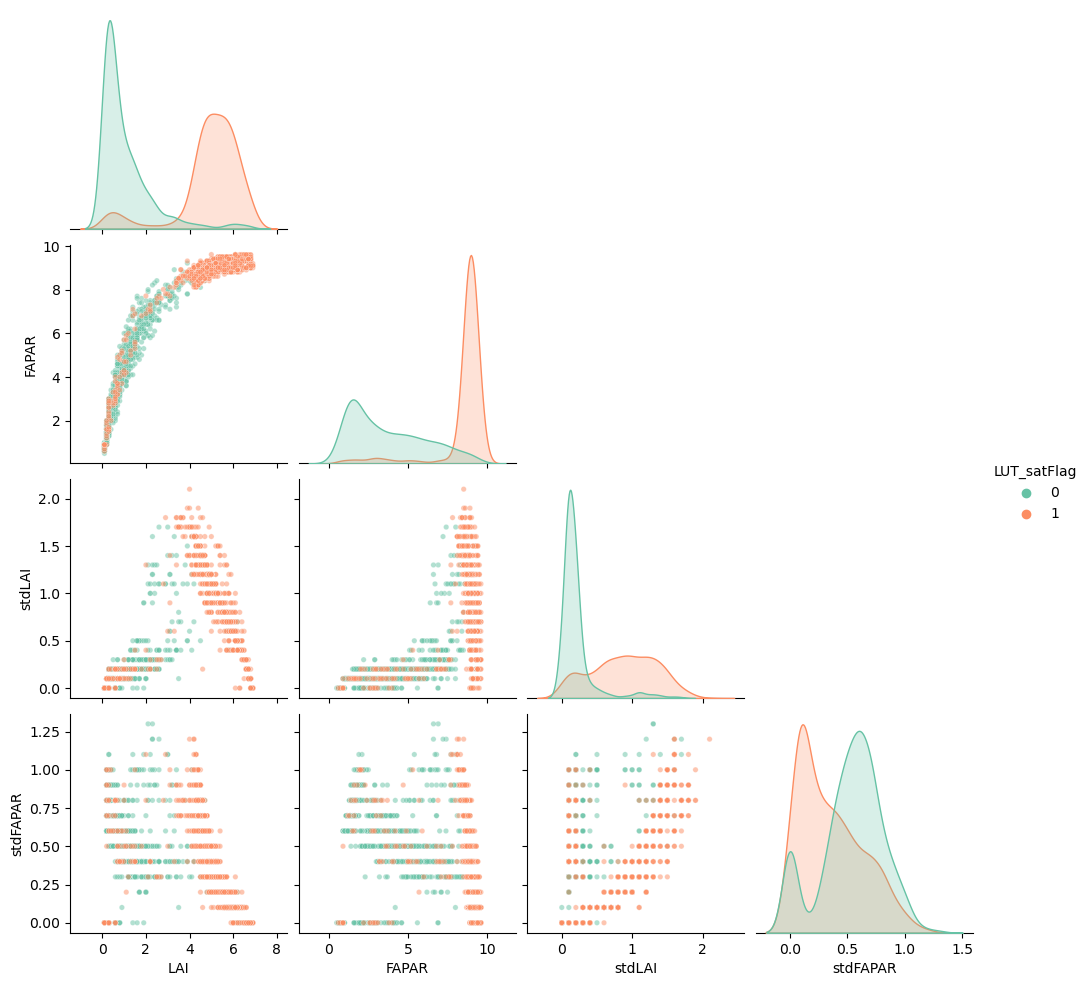

In [12]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALL.loc[dfALL['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

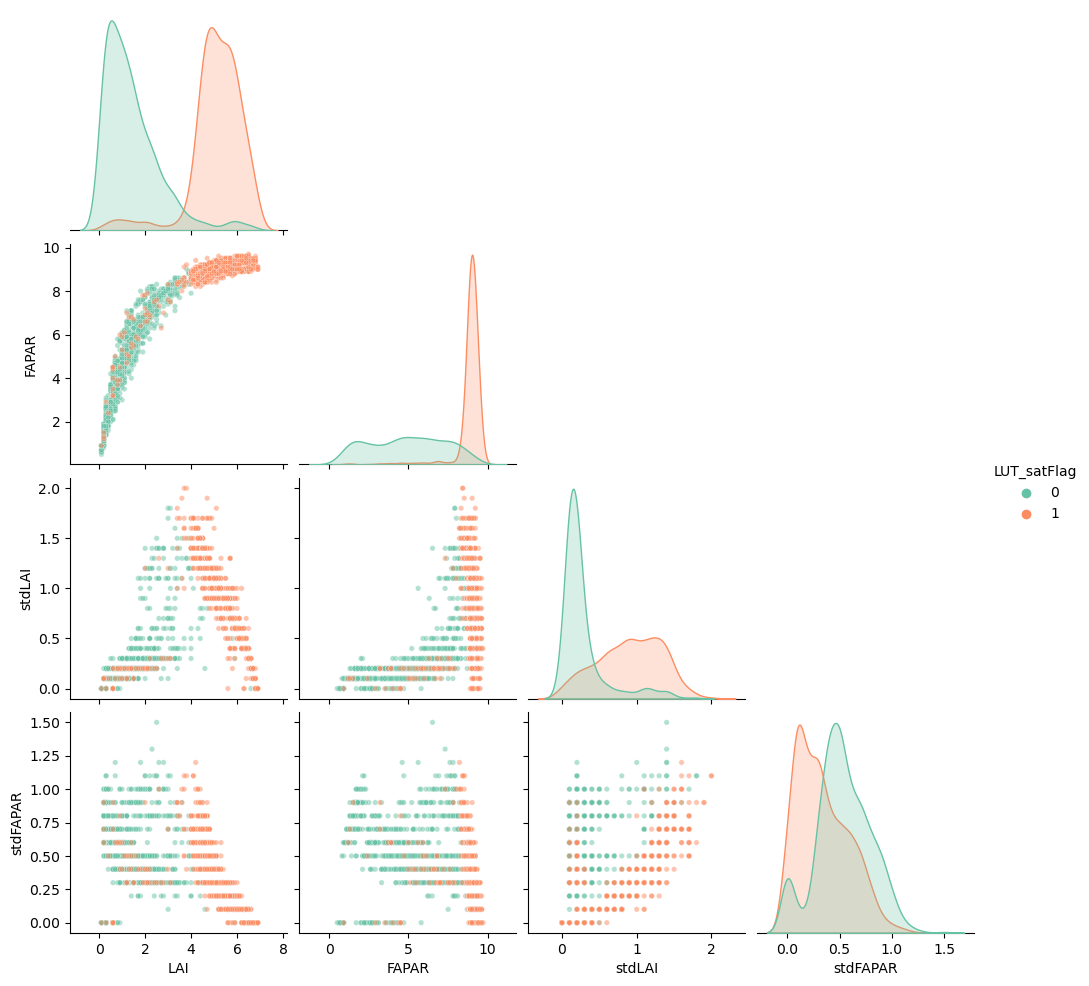

In [13]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALLtrim.loc[dfALLtrim['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

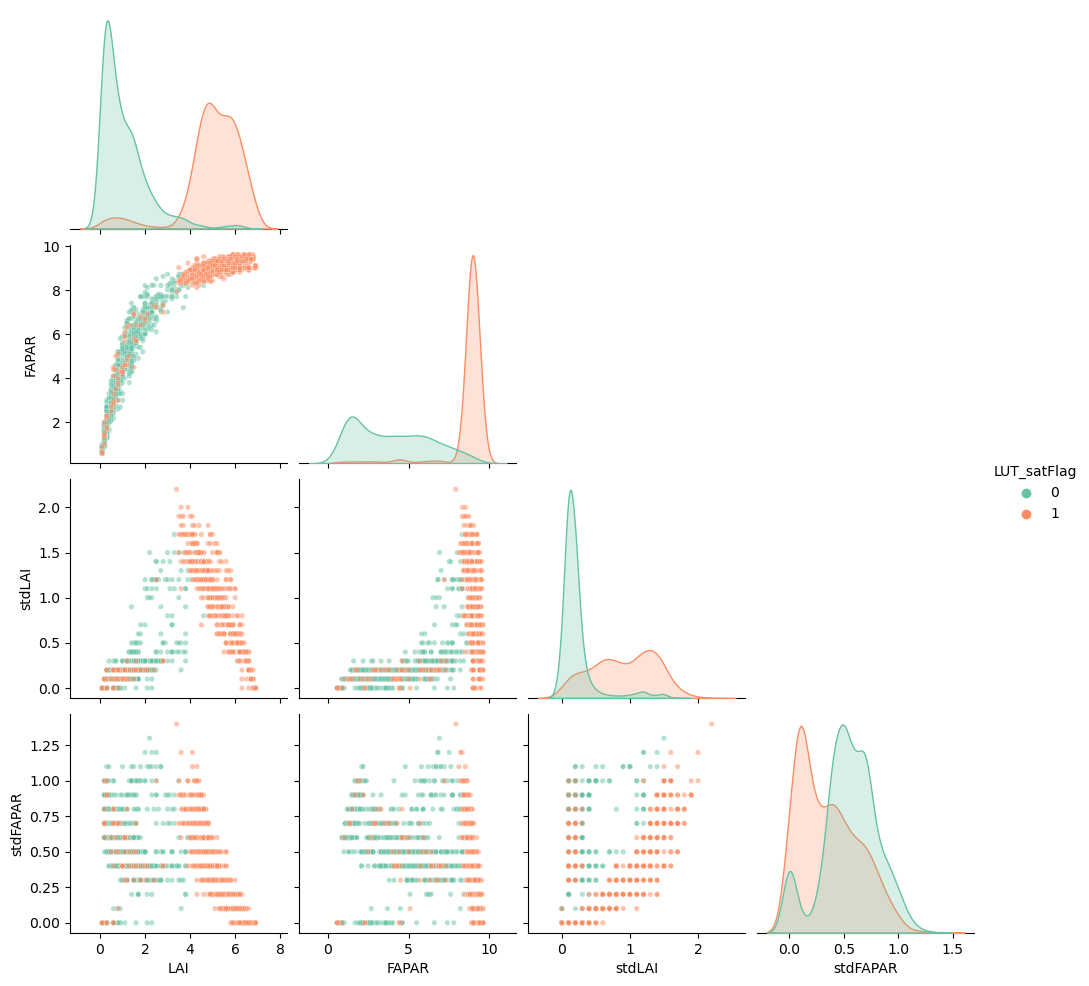

In [14]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

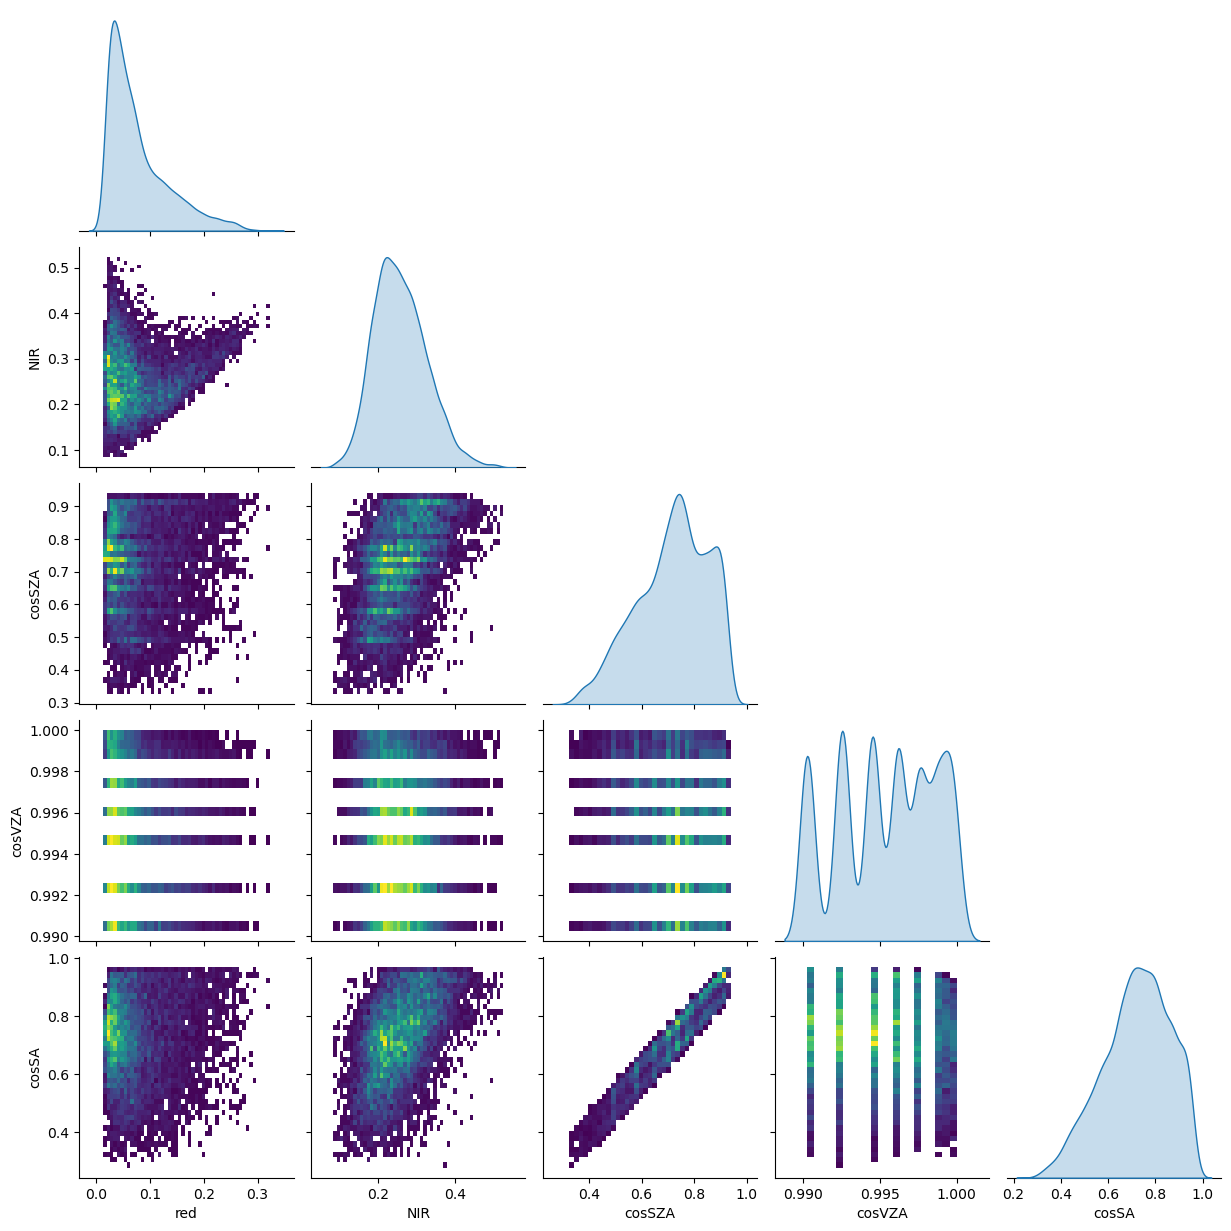

In [15]:
pairplot = sns.pairplot(dfALLtrim.loc[dfALLtrim['LC_type3']<9][['red','NIR','cosSZA','cosVZA','cosSA']].sample(10000).divide(10000),plot_kws={'cmap':'viridis'},kind='hist',diag_kind='kde',corner=True)
#pairplot.fig.savefig("Figure4.png", bbox_inches='tight') 

Graphs for dfALL

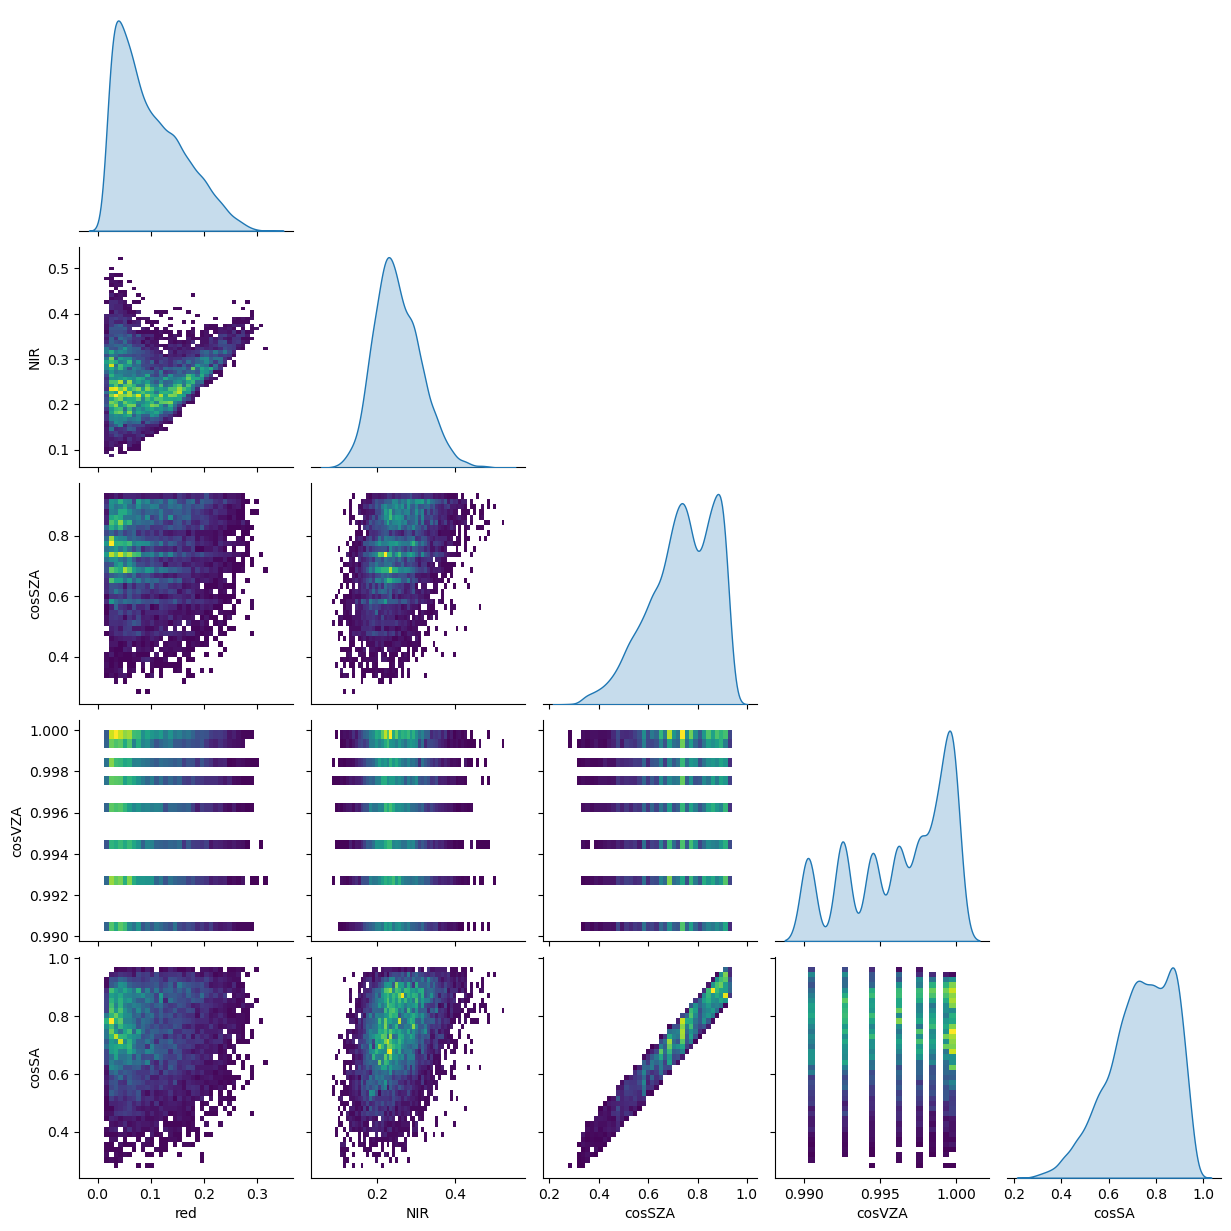

In [16]:
pairplot = sns.pairplot(dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['red','NIR','cosSZA','cosVZA','cosSA']].sample(10000).divide(10000),plot_kws={'cmap':'viridis'},kind='hist',diag_kind='kde',corner=True)
#pairplot.fig.savefig("Figure4.png", bbox_inches='tight')

## Random Forest

Reading in calibration and validation data.

In [64]:
# Validation data for LAI and FAPAR
valbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictLAI.pkl')
valbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictFAPAR.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAI.pkl')
calbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPAR.pkl')

# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPARKANG.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

In [18]:
# Regressors used in fitting the Random Forests
regressors = ['Lat','Lon','red','green','NIR','SWIR1','NDVI','NDWI','cosSZA','cosSA']

# Responses in the Random Forests
LAI = 'LAI'
FAPAR = 'FAPAR'

### NAIVE LAI

Fitting a Random Forests for LAI using the NAIVE method

In [41]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsLAI = []
dfsLAI10 = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictLAI:
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictLAI[LC_Type3]['DF'].sample(10000)
        dfval = valbiomeDictLAI[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictLAI[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictLAI[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[LAI])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictLAI[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictLAI[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[LAI])
        
        trueLAI = dfval[LAI]
        
        # Predicting LAI with the Random Forest using the validation data
        predLAI50 = calbiomeDictLAI[LC_Type3]['regr50'].predict(dfval[regressors])
        predLAI10 = calbiomeDictLAI[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictLAI[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictLAI[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAI[LC_Type3]['regr50'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI50, trueLAI, squared=False),
            'Nodes': n50})
        
        valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAI[LC_Type3]['regr10'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI10, trueLAI, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'].join(valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsLAI.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeLAI = pd.concat(dfsLAI)

In [43]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI']['Nodes'].unique()[0], valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI']['Nodes'].unique()[0])

6 9688 49561
4 9610 49459
7 9692 49409
2 9575 44672
1 9662 47633
8 9708 49536
3 9702 49526
5 9780 49576


R^2 and RMSE values for LAI Random Forest with min 50 leaf samples

In [21]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8375823754031047 7.664674602257081
4 0.6297222206727742 11.774038469345003
7 0.6921153713092791 10.112314173411294
2 0.8173694936974024 5.276094480853483
1 0.5832116265989593 11.738023698269433
8 0.785306530458693 8.806633647153815
3 0.635009365524221 11.644550529794191
5 0.5930422986681588 11.26499008796877


R^2 and RMSE values for LAI Random Forest with min 10 leaf samples

In [22]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8499233301350095 7.36773058802951
4 0.6511748903272585 11.427875357620325
7 0.7141267730771822 9.744135004310182
2 0.8609015151787188 4.604549033627395
1 0.6332660094104847 11.010645147068141
8 0.8100566699800962 8.283474446086316
3 0.6828963125285643 10.853817515563996
5 0.6518728056905907 10.418978770732625


Scatterplotting True LAI vs Predicted LAI

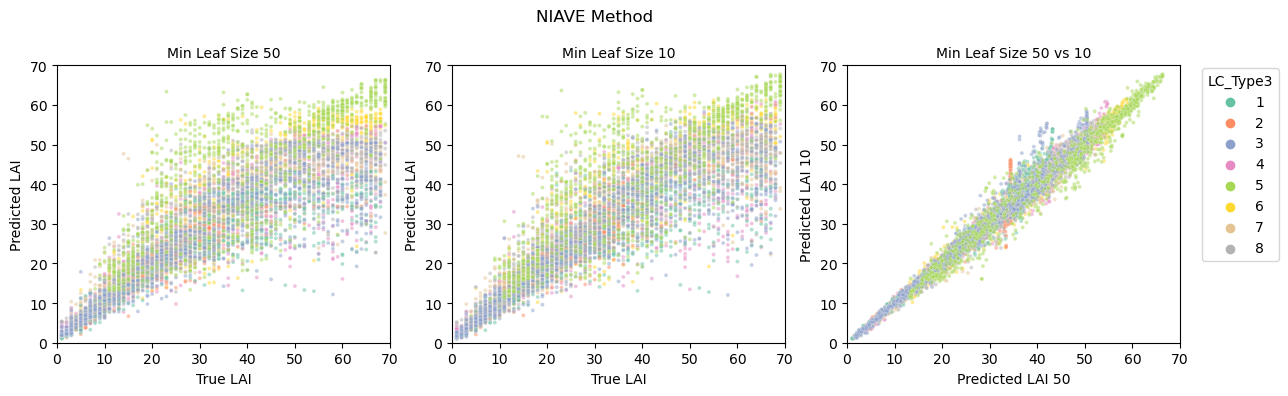

In [23]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeLAI, x='LAI_50', y='Predicted LAI_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeLAI, x='LAI_10', y='Predicted LAI_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeLAI, x='Predicted LAI_50', y='Predicted LAI_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('NIAVE Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[0].set_xlim(0, 70)
axs[0].set_ylim(0, 70)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[1].set_xlim(0, 70)
axs[1].set_ylim(0, 70)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted LAI 50', ylabel='Predicted LAI 10')
axs[2].set_xlim(0, 70)
axs[2].set_ylim(0, 70)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

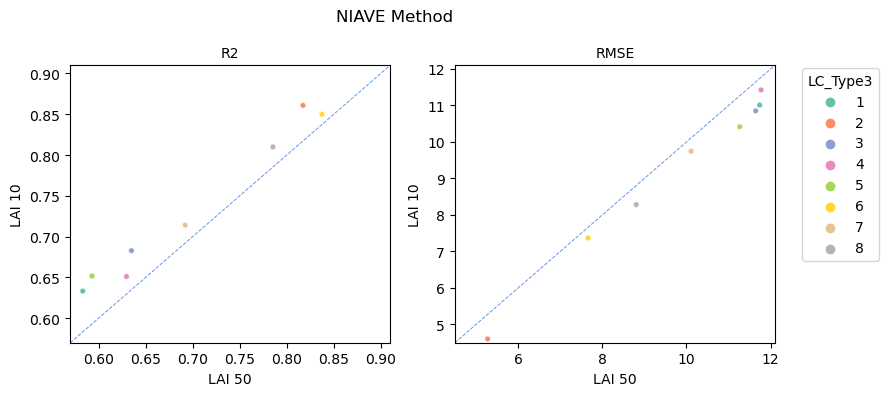

In [24]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeLAI, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeLAI, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

fig.suptitle('NIAVE Method')

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='LAI 50', ylabel='LAI 10')
axs[0].set_xlim(0.57, 0.91)
axs[0].set_ylim(0.57, 0.91)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='LAI 50', ylabel='LAI 10')
axs[1].set_xlim(4.5, 12.1)
axs[1].set_ylim(4.5, 12.1)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

### NAIVE FAPAR

Fitting a Random Forests for FAPAR using the NAIVE method

In [44]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsFAPAR = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictFAPAR:
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictFAPAR[LC_Type3]['DF'].sample(10000)
        dfval = valbiomeDictFAPAR[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictFAPAR[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictFAPAR[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[FAPAR])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictFAPAR[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictFAPAR[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[FAPAR])
        
        trueFAPAR = dfval[FAPAR]
        
        # Predicting FAPAR with the Random Forest using the validation data
        predFAPAR50 = calbiomeDictFAPAR[LC_Type3]['regr50'].predict(dfval[regressors])
        predFAPAR10 = calbiomeDictFAPAR[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictFAPAR[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictFAPAR[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPAR[LC_Type3]['regr50'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR50, trueFAPAR, squared=False),
            'Nodes': n50})
        
        valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPAR[LC_Type3]['regr10'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR10, trueFAPAR, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'].join(valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsFAPAR.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeFAPAR = pd.concat(dfsFAPAR)

In [46]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR']['Nodes'].unique()[0], valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR']['Nodes'].unique()[0])

6 9662 49491
4 9723 49484
7 9808 49586
2 9646 49445
1 9649 49573
8 9700 49663
3 9705 49480
5 9728 50107


R^2 and RMSE values for FAPAR Random Forest with min 50 leaf samples

In [26]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.9162044456294989 5.4806029331582184
4 0.8170035382596892 7.543143444917641
7 0.6781280190053853 7.384184414837324
2 0.9741274685873995 3.7218762370990293
1 0.9406624368049086 5.2860709836389494
8 0.8608078638134479 6.269032655774966
3 0.9138724403862905 6.330239566409008
5 0.7195697809599197 5.020209440524842


R^2 and RMSE values for FAPAR Random Forest with min 10 leaf samples

In [27]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.924869299075525 5.189512589180524
4 0.8376913996301987 7.103980924737075
7 0.70952735450413 7.014772131630042
2 0.977108767134908 3.500878654286819
1 0.9443528664067223 5.1190519432804935
8 0.8849549996715423 5.699372688779582
3 0.922400286783464 6.008680796694217
5 0.7709171751909851 4.537385672184148


Scatterplotting True FAPAR vs Predicted FAPAR with the NAIVE Method

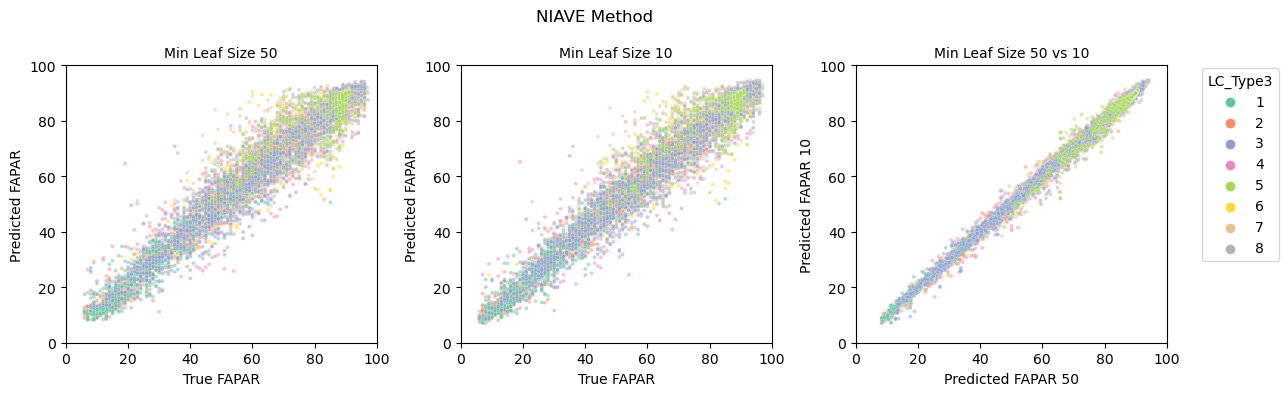

In [28]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeFAPAR, x='FAPAR_50', y='Predicted FAPAR_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeFAPAR, x='FAPAR_10', y='Predicted FAPAR_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeFAPAR, x='Predicted FAPAR_50', y='Predicted FAPAR_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('NIAVE Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[0].set_xlim(0, 100)
axs[0].set_ylim(0, 100)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[1].set_xlim(0, 100)
axs[1].set_ylim(0, 100)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted FAPAR 50', ylabel='Predicted FAPAR 10')
axs[2].set_xlim(0, 100)
axs[2].set_ylim(0, 100)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

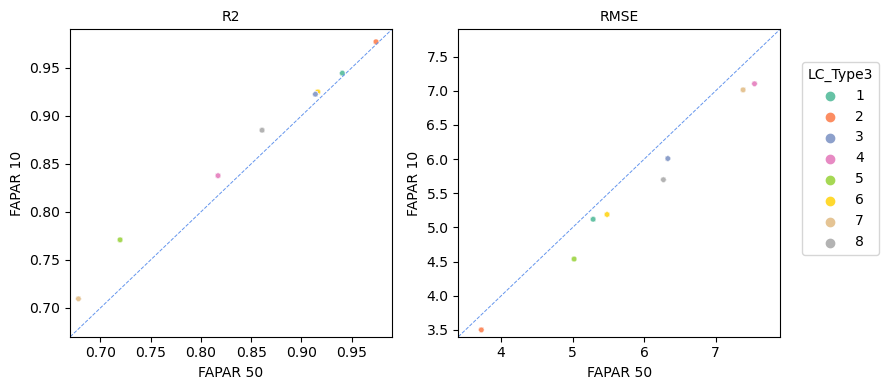

In [29]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeFAPAR, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeFAPAR, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[0].set_xlim(0.67, 0.99)
axs[0].set_ylim(0.67, 0.99)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[1].set_xlim(3.4, 7.9)
axs[1].set_ylim(3.4, 7.9)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

### KANG LAI

Fitting a Random Forests for LAI using the KANG method

In [89]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsLAI = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictLAIKANG:
    
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictLAIKANG[LC_Type3]['DF'].sample(10000)
        dfval = valbiomeDictLAI[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictLAIKANG[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictLAIKANG[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[LAI])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictLAIKANG[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictLAIKANG[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[LAI])
        
        trueLAI = dfval[LAI]
        
        # Predicting LAI with the Random Forest using the validation data
        predLAI50 = calbiomeDictLAIKANG[LC_Type3]['regr50'].predict(dfval[regressors])
        predLAI10 = calbiomeDictLAIKANG[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictLAIKANG[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictLAIKANG[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictLAI[LC_Type3]['dfKANG50LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAIKANG[LC_Type3]['regr50'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI50, trueLAI, squared=False),
            'Nodes': n50})
        
        valbiomeDictLAI[LC_Type3]['dfKANG10LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAIKANG[LC_Type3]['regr10'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI10, trueLAI, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictLAI[LC_Type3]['dfKANG50LAI'].join(valbiomeDictLAI[LC_Type3]['dfKANG10LAI'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsLAI.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeLAIKANG = pd.concat(dfsLAI)

In [90]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictLAI[LC_Type3]['dfKANG50LAI']['Nodes'].unique()[0], valbiomeDictLAI[LC_Type3]['dfKANG10LAI']['Nodes'].unique()[0])

6 9676 49518
4 9643 49414
7 9659 49419
2 9575 45976
1 9670 44636
8 9624 49436
3 9669 49309
5 9633 49489


R^2 and RMSE values for LAI Random Forest with min 50 leaf samples

In [91]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfKANG50LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8587248709154578 7.289891254422329
4 0.7270650029739328 10.48540828872365
7 0.7183881293566321 9.552911628101885
2 0.8211643612774998 5.210842439637992
1 0.7351349288335409 9.828435811385225
8 0.7874663996041207 8.800140303932384
3 0.7013939718207727 10.902801715553663
5 0.6704823598839905 9.200221917120938


R^2 and RMSE values for LAI Random Forest with min 10 leaf samples

In [92]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfKANG10LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8754147397550573 6.845757727648511
4 0.7596295387866177 9.840026796930797
7 0.7460115441036563 9.072297231791616
2 0.8515264382727953 4.7479427098420635
1 0.7662425344322105 9.233254485691806
8 0.8236717214728553 8.015613728259746
3 0.7393132890465223 10.187046175554062
5 0.800324440941893 7.1617873753587435


Scatterplotting True LAI vs Predicted LAI

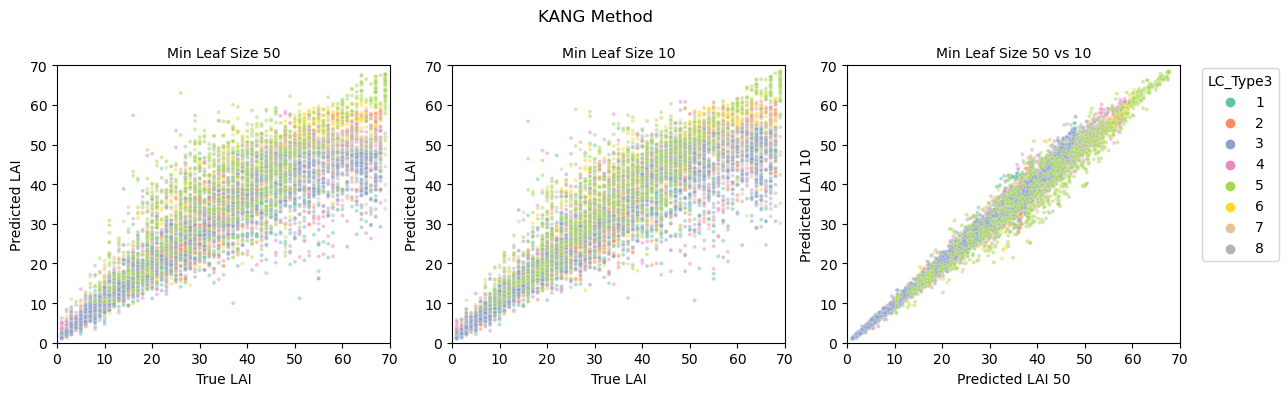

In [93]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeLAIKANG, x='LAI_50', y='Predicted LAI_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeLAIKANG, x='LAI_10', y='Predicted LAI_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeLAIKANG, x='Predicted LAI_50', y='Predicted LAI_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('KANG Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[0].set_xlim(0, 70)
axs[0].set_ylim(0, 70)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[1].set_xlim(0, 70)
axs[1].set_ylim(0, 70)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted LAI 50', ylabel='Predicted LAI 10')
axs[2].set_xlim(0, 70)
axs[2].set_ylim(0, 70)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

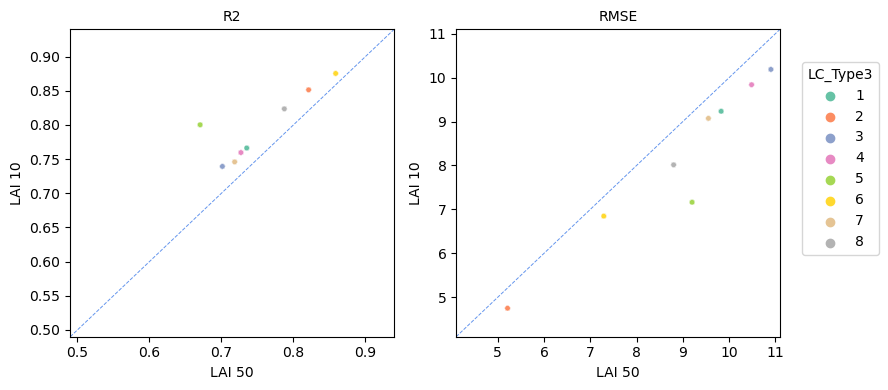

In [95]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeLAIKANG, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeLAIKANG, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='LAI 50', ylabel='LAI 10')
axs[0].set_xlim(0.49, 0.94)
axs[0].set_ylim(0.49, 0.94)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='LAI 50', ylabel='LAI 10')
axs[1].set_xlim(4.1, 11.1)
axs[1].set_ylim(4.1, 11.1)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

### KANG FAPAR

Fitting a Random Forests for FAPAR using the KANG method

In [96]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsFAPAR = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictFAPARKANG:
    
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictFAPARKANG[LC_Type3]['DF'].sample(10000)
        dfval = valbiomeDictFAPAR[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictFAPARKANG[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictFAPARKANG[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[FAPAR])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictFAPARKANG[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictFAPARKANG[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[FAPAR])
        
        trueFAPAR = dfval[FAPAR]
        
        # Predicting FAPAR with the Random Forest using the validation data 
        predFAPAR50 = calbiomeDictFAPARKANG[LC_Type3]['regr50'].predict(dfval[regressors])
        predFAPAR10 = calbiomeDictFAPARKANG[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Determining the number of leaf nodes in each Random Forest
        n50 = 0
        for tree in calbiomeDictFAPARKANG[LC_Type3]['regr50'].estimators_:
            n50 += tree.get_n_leaves()
        n10 = 0
        for tree in calbiomeDictFAPARKANG[LC_Type3]['regr10'].estimators_:
            n10 += tree.get_n_leaves()
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPARKANG[LC_Type3]['regr50'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR50, trueFAPAR, squared=False),
            'Nodes': n50})
        
        valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPARKANG[LC_Type3]['regr10'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR10, trueFAPAR, squared=False),
            'Nodes': n10})
        
        # Merge two methods before sampling
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'].join(valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsFAPAR.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeFAPARKANG = pd.concat(dfsFAPAR)

In [97]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        print(LC_Type3, valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR']['Nodes'].unique()[0], valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR']['Nodes'].unique()[0])

6 9644 49514
4 9694 49398
7 9724 49453
2 9668 49571
1 9674 49470
8 9736 49538
3 9669 49470
5 9767 50028


R^2 and RMSE values for FAPAR Random Forest with min 50 leaf samples

In [98]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8895961634153909 8.01619807306172
4 0.8511560094699371 8.782935309439322
7 0.6812708412565895 9.651201848006236
2 0.9615494860313998 4.602952657415126
1 0.9514127754453227 6.318406649538214
8 0.8278043646438789 8.398438546446755
3 0.9465498751084456 6.339752066672066
5 0.5791910083679311 8.589678341115318


R^2 and RMSE values for FAPAR Random Forest with min 10 leaf samples

In [99]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.909337981532143 7.2642210084073815
4 0.8726922792867869 8.12271850355119
7 0.7371242270393 8.76487610998797
2 0.9657013275808521 4.347344819062169
1 0.9532631297843388 6.196926436278395
8 0.8758775467213797 7.130379657958731
3 0.9540623543681169 5.877359803345082
5 0.6806895315426265 7.482400907345284


Scatterplotting True FAPAR vs Predicted FAPAR

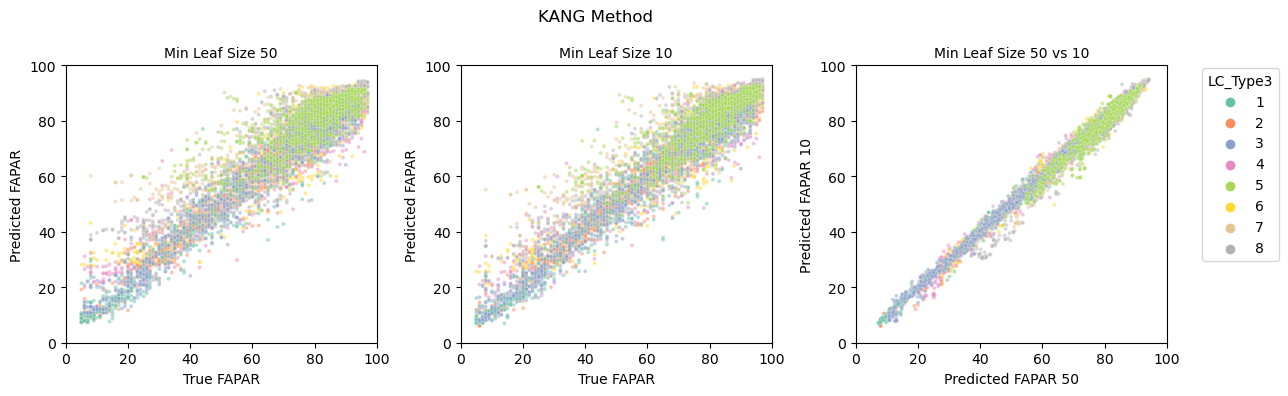

In [100]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeFAPARKANG, x='FAPAR_50', y='Predicted FAPAR_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeFAPARKANG, x='FAPAR_10', y='Predicted FAPAR_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeFAPARKANG, x='Predicted FAPAR_50', y='Predicted FAPAR_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('KANG Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[0].set_xlim(0, 100)
axs[0].set_ylim(0, 100)

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')
axs[1].set_xlim(0, 100)
axs[1].set_ylim(0, 100)

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted FAPAR 50', ylabel='Predicted FAPAR 10')
axs[2].set_xlim(0, 100)
axs[2].set_ylim(0, 100)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

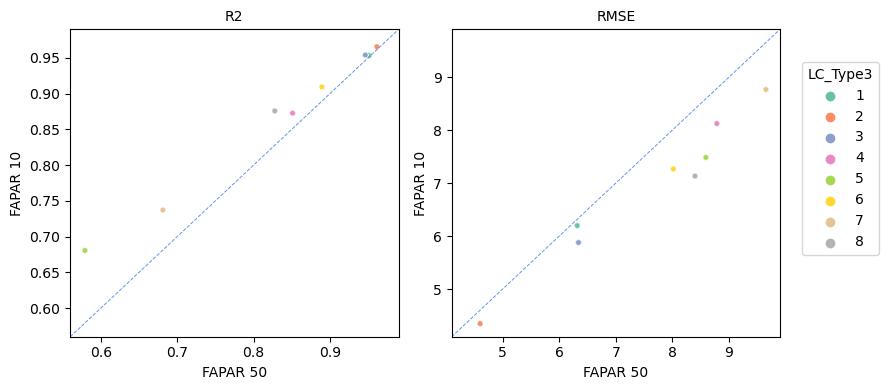

In [102]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfcalbiomeFAPARKANG, x='R2_50', y='R2_10', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfcalbiomeFAPARKANG, x='RMSE_50', y='RMSE_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=15, alpha=1)

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[0].set_xlim(0.56, 0.99)
axs[0].set_ylim(0.56, 0.99)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='FAPAR 50', ylabel='FAPAR 10')
axs[1].set_xlim(4.1, 9.9)
axs[1].set_ylim(4.1, 9.9)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

## North America

### Random Forests

Reading in calibration and validation data dictionaries

In [ ]:
# Validation data for LAI and FAPAR
valbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/valbiomeDictLAI.pkl')
valbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/valbiomeDictFAPAR.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/calbiomeDictLAI.pkl')
calbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/calbiomeDictFAPAR.pkl')

# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/calbiomeDictFAPARKANG.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAIFTL = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/calbiomeDictLAIFTL.pkl')
calbiomeDictFAPARFTL = pd.read_pickle('G:/cassidy/MODISLANDSAT_new/calbiomeDictFAPARFTL.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

Making copies of dictionaries to subsample North American samples

In [ ]:
# Copy of validation data for LAI and FAPAR
NAvalbiomeDictLAI = copy.deepcopy(valbiomeDictLAI)
NAvalbiomeDictFAPAR = copy.deepcopy(valbiomeDictFAPAR)

# copy of calibration data for LAI and FAPAR
NAcalbiomeDictLAI = copy.deepcopy(calbiomeDictLAI)
NAcalbiomeDictFAPAR = copy.deepcopy(calbiomeDictFAPAR)

Subsampling data to North America only

In [ ]:
for LC_Type3 in valbiomeDictLAI:
    # Validation data for LAI and FAPAR in North America
    df = NAvalbiomeDictLAI[LC_Type3]['DF']
    NAvalbiomeDictLAI[LC_Type3]['DF'] = df.loc[(df['Lat'] >= 7) & (df['Lat'] <= 85) & (df['Lon'] >= -180) & (df['Lon'] <= -20)]
    
    df = NAvalbiomeDictFAPAR[LC_Type3]['DF']
    NAvalbiomeDictFAPAR[LC_Type3]['DF'] = df.loc[(df['Lat'] >= 7) & (df['Lat'] <= 85) & (df['Lon'] >= -180) & (df['Lon'] <= -20)]

    # Calibration data for LAI and FAPAR in North America
    df = NAcalbiomeDictLAI[LC_Type3]['DF']
    NAcalbiomeDictLAI[LC_Type3]['DF'] = df.loc[(df['Lat'] >= 7) & (df['Lat'] <= 85) & (df['Lon'] >= -180) & (df['Lon'] <= -20)]
    
    df = NAcalbiomeDictFAPAR[LC_Type3]['DF']
    NAcalbiomeDictFAPAR[LC_Type3]['DF'] = df.loc[(df['Lat'] >= 7) & (df['Lat'] <= 85) & (df['Lon'] >= -180) & (df['Lon'] <= -20)]

Fitting a Random Forest on the global calibration data using the NAIVE method

In [ ]:
# NAIVE LAI
method='NAIVE'
regressors = ['red','NIR','cosSZA','cosVZA','cosSA']
response = 'LAI'
valbiomeDFLAI = pd.DataFrame()
for LC_type3 in calbiomeDictLAI.keys():
    df = calbiomeDictLAI[LC_type3]['DF']
    calbiomeDictLAI[LC_type3][method+response+'regression']  = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,max_features=5,bootstrap=True,random_state=0,verbose=0,n_jobs=-1,max_leaf_nodes=10000).fit(df[regressors],np.array(df[response]).ravel())
    calbiomeDictLAI[LC_type3]['DF'][method+response] = calbiomeDictLAI[LC_type3][method+response+'regression'].predict(df[regressors])
    valbiomeDictLAI[LC_type3][method+response+'regression'] = calbiomeDictLAI[LC_type3][method+response+'regression']
    valbiomeDictLAI[LC_type3]['DF'][method+response] = valbiomeDictLAI[LC_type3][method+response+'regression'].predict(valbiomeDictLAI[LC_type3]['DF'][regressors])
    valbiomeDFLAI = pd.concat([valbiomeDFLAI,valbiomeDictLAI[LC_type3]['DF']])
sns.scatterplot(valbiomeDFLAI.sample(10000),y=response,x=method+response,hue='LC_type3',s=8,alpha=0.5,palette='muted')

Fitting a Random Forest on the North America calibration data using the NAIVE method

In [ ]:
# NAIVE LAI
method='NA_NAIVE'
regressors = ['red','NIR','cosSZA','cosVZA','cosSA']
response = 'LAI'
NAvalbiomeDFLAI = pd.DataFrame()
for LC_type3 in NAcalbiomeDictLAI.keys():
    df = NAcalbiomeDictLAI[LC_type3]['DF']
    NAcalbiomeDictLAI[LC_type3][method+response+'regression']  = RandomForestRegressor(n_estimators=100,min_samples_leaf=10,max_features=5,bootstrap=True,random_state=0,verbose=0,n_jobs=-1,max_leaf_nodes=10000).fit(df[regressors],np.array(df[response]).ravel())
    NAcalbiomeDictLAI[LC_type3]['DF'][method+response] = NAcalbiomeDictLAI[LC_type3][method+response+'regression'].predict(df[regressors])
    NAvalbiomeDictLAI[LC_type3][method+response+'regression'] = NAcalbiomeDictLAI[LC_type3][method+response+'regression']
    NAvalbiomeDictLAI[LC_type3]['DF'][method+response] = NAvalbiomeDictLAI[LC_type3][method+response+'regression'].predict(NAvalbiomeDictLAI[LC_type3]['DF'][regressors])
    NAvalbiomeDFLAI = pd.concat([NAvalbiomeDFLAI,NAvalbiomeDictLAI[LC_type3]['DF']])
sns.scatterplot(NAvalbiomeDFLAI.sample(10000),y=response,x=method+response,hue='LC_type3',s=8,alpha=0.5,palette='muted')

### Results

Number of samples in each biome for the North American and global calibration dataset

In [ ]:
for LC_Type3 in NAcalbiomeDictLAI:
    print('{0: <3} {1: <8} {2}'.format(LC_Type3, len(NAcalbiomeDictLAI[LC_Type3]['DF']), len(calbiomeDictLAI[LC_Type3]['DF'])))

Number of leaf nodes for each biome for the fitted Random Forests

In [ ]:
for LC_Type3 in NAvalbiomeDictLAI:
    if LC_Type3 <= 8:
        NAnodes = 0
        nodes = 0
        for tree in NAvalbiomeDictLAI[LC_Type3]['NA_NAIVELAIregression'].estimators_:
            NAnodes += tree.get_n_leaves()
        for tree in valbiomeDictLAI[LC_Type3]['NAIVELAIregression'].estimators_:
            nodes += tree.get_n_leaves()
        print('{0: <2} {1: <8} {2}'.format(LC_Type3, NAnodes, nodes))

Calculate the R^2 for the NAIVE method fitted with the North America and Global calibration dataset

In [ ]:
regressors = ['red','NIR','cosSZA','cosVZA','cosSA']
dfR2 = pd.DataFrame()
for LC_Type3 in NAvalbiomeDictLAI:
    if LC_Type3 <= 8:
        R2_NA = NAcalbiomeDictLAI[LC_Type3]['NA_NAIVELAIregression'].score(NAcalbiomeDictLAI[LC_Type3]['DF'][regressors], NAcalbiomeDictLAI[LC_Type3]['DF']['LAI'])
        R2 = calbiomeDictLAI[LC_Type3]['NAIVELAIregression'].score(calbiomeDictLAI[LC_Type3]['DF'][regressors], calbiomeDictLAI[LC_Type3]['DF']['LAI'])
        d = {'LC_Type3': [LC_Type3], 'R2_Global':[R2], 'R2_NA': [R2_NA]}
        df = pd.DataFrame(data=d)
        dfR2 = pd.concat([dfR2, df])
        print('{0: <4} {1: <20} {2}'.format(LC_Type3, R2_NA, R2))

Calculate the RMSE for the NAIVE method fitted with the North America and Global calibration dataset

In [ ]:
dfRMSE = pd.DataFrame()
for LC_Type3 in NAvalbiomeDictLAI:
    if LC_Type3 <= 8:
        RMSE_NA = metrics.mean_squared_error(NAcalbiomeDictLAI[LC_Type3]['DF']['NA_NAIVELAI'], NAcalbiomeDictLAI[LC_Type3]['DF']['LAI'], squared=False)
        RMSE = metrics.mean_squared_error(calbiomeDictLAI[LC_Type3]['DF']['NAIVELAI'], calbiomeDictLAI[LC_Type3]['DF']['LAI'], squared=False)
        d = {'LC_Type3': [LC_Type3], 'RMSE_Global':[RMSE], 'RMSE_NA': [RMSE_NA]}
        df = pd.DataFrame(data=d)
        dfRMSE = pd.concat([dfRMSE, df])
        print('{0: <4} {1: <20} {2}'.format(LC_Type3, RMSE_NA, RMSE))

Scatterplot of the R^2 and RMSE comparing the two datasets

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(dfR2, x='R2_Global', y='R2_NA', ax=axs[0], hue='LC_Type3', palette='Set2', s=15, alpha=1, legend=0)
sns.scatterplot(dfRMSE, x='RMSE_Global', y='RMSE_NA', ax=axs[1], hue='LC_Type3', palette='Set2', s=15, alpha=1)

axs[0].set_title('R2', size=10)
axs[0].set(xlabel='Global', ylabel='North America')
axs[0].set_xlim(0.76, 0.99)
axs[0].set_ylim(0.76, 0.99)
axs[0].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

axs[1].set_title('RMSE', size=10)
axs[1].set(xlabel='Global', ylabel='North America')
axs[1].set_xlim(1.1, 6.9)
axs[1].set_ylim(1.1, 6.9)
axs[1].axline((0,0), slope=1, c='cornflowerblue', lw=0.7, ls='--')

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

Scatterplot of both datasets comparing the predicted LAI and true LAI

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(8, 4))
sns.scatterplot(valbiomeDFLAI.sample(10000), x='LAI', y='NAIVELAI', ax=axs[0], hue='LC_type3', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(NAvalbiomeDFLAI.sample(10000), x='LAI', y='NA_NAIVELAI', ax=axs[1], hue='LC_type3', palette='Set2', s=8, alpha=0.5)

fig.suptitle('NAIVE Method')
axs[0].set_title('Global', size=10)
axs[0].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[0].set_xlim(0, 70)
axs[0].set_ylim(0, 70)

axs[1].set_title('North America', size=10)
axs[1].set(xlabel='True LAI', ylabel='Predicted LAI')
axs[1].set_xlim(0, 70)
axs[1].set_ylim(0, 70)

fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

## LUT_satFlag Filter

In [210]:
# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPARKANG.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

In [211]:
# Regressors used in fitting the Random Forests
regressors = ['Lat','Lon','red','green','NIR','SWIR1','NDVI','NDWI','cosSZA','cosSA']

# Responses in the Random Forests
satFlag = 'LUT_satFlag'

Concatenate all biome types into one dataframe

In [212]:
dfs = []
for LC_Type3 in calbiomeDictLAIKANG:
    if LC_Type3 <= 8:
        dfs.append(calbiomeDictLAIKANG[LC_Type3]['DF'])
dfKANGLAI = pd.concat(dfs)

Fitting a Random Forest Classifier to predict LUT_satFlag

In [213]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfs = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictLAIKANG:
    
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictLAIKANG[LC_Type3]['DF'].sample(10000)
        dfval = calbiomeDictLAIKANG[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictLAIKANG[LC_Type3]['sat_class'] = RandomForestClassifier(n_estimators=100,min_samples_leaf=10,max_features=5,bootstrap=True,random_state=0,verbose=0,n_jobs=-1,max_leaf_nodes=10000)
        calbiomeDictLAIKANG[LC_Type3]['sat_class'].fit(dfcal[regressors], dfcal[satFlag])
        
        # Predicting LUT_satFlag with the Random Forest using the validation data
        predSatFlag = calbiomeDictLAIKANG[LC_Type3]['sat_class'].predict(dfval[regressors])
        
        # Inserting the new statistics as a column into the dataframe
        calbiomeDictLAIKANG[LC_Type3]['DF']['predSatFlag'] = predSatFlag

Filter out all data where the predicted LUT_satFlag and true LUT_satFlag differ

In [214]:
for LC_Type3 in calbiomeDictLAIKANG:
    if LC_Type3 <= 8:
        df = calbiomeDictLAIKANG[LC_Type3]['DF']
        
        # Only keep data where the predicted satFlag matches the true satFlag
        calbiomeDictLAIKANG[LC_Type3]['DF'] = df.loc[df['LUT_satFlag'] == df['predSatFlag']]

In [215]:
# Prints dataframe for biome 1 where predicted LUT_satFlag and true LUT_satFlag differ to check filtering worked
df = calbiomeDictLAIKANG[1]['DF']
df.loc[(df['LUT_satFlag'] != df['predSatFlag']) & (df['LUT_satFlag'] == 0)]

Empty DataFrame
Columns: [year, month, day, path, row, Lat, Lon, input36, input45, inputMOD09, redMODIS, NIRMODIS, green, red, NIR, SWIR1, SensorZenith, SensorAzimuth, SolarZenith, SolarAzimuth, M_sensor_zenith, M_sensor_azimuth, M_sun_zenith, M_sun_azimuth, LC_type3, output, LAI, stdLAI, FAPAR, stdFAPAR, LUT_satFlag, LUT_snowFlag, cosSZA, cosVZA, cosSA, NDVI, NDWI, kde, predSatFlag]
Index: []

[0 rows x 39 columns]

Number of samples in each biome type after filtering

In [216]:
for LC_Type3 in calbiomeDictLAIKANG:
    print('{0: <3} {1: <8}'.format(LC_Type3, len(calbiomeDictLAIKANG[LC_Type3]['DF'])))

6   428077  
4   1525431 
7   287518  
9   18743   
2   448124  
1   2170150 
8   50130   
3   231392  
5   176187  
10  2087    


Saturation classification accuracy based on 10-fold cross-validation

In [217]:
# List of desired metrics and scoting to quantify the quality of the prediction
scores = ['accuracy','f1','precision','recall']

# Loop through all LC_type3 in the dictionary
for LC_Type3 in calbiomeDictLAIKANG:
    
    # Only take LC_Type 1 to 8
    if LC_Type3 <= 8:
        
        # Initializing clf to the desired estimator (RandomForestClassifier)
        clf = calbiomeDictLAIKANG[LC_Type3]['sat_class']
        # clf = RandomForestClassifier(n_estimators=100,min_samples_leaf=10,max_features=5,bootstrap=True,random_state=0,verbose=0,n_jobs=-1,max_leaf_nodes=10000)
        
        # Extracting the desired dataframe (subsampling to 10000 samples for faster results)
        df = calbiomeDictLAIKANG[LC_Type3]['DF'].sample(10000)
        
        # Cross validating the estimator with 10-fold cross validation
        cv_results = cross_validate(estimator=clf, X=df[regressors], y=df[satFlag], cv=10, scoring=scores)
        
        
        # print(LC_Type3, v)
        print(LC_Type3, cv_results.keys())
        for score in cv_results.keys():
            print('{0: <16} {1: <8}'.format(score, np.mean(cv_results[score])))

6 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'])
fit_time         4.523362398147583
score_time       0.12764806747436525
test_accuracy    0.9782  
test_f1          0.9748827765701327
test_precision   0.9675914053768485
test_recall      0.9823460853612473
4 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'])
fit_time         0.33437845706939695
score_time       0.11965720653533936
test_accuracy    0.9921  
test_f1          0.81886589035136
test_precision   0.8976312725353646
test_recall      0.7603260869565218
7 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'])
fit_time         0.32887897491455076
score_time       0.1146615982055664
test_accuracy    0.9693999999999999
test_f1          0.9013436614558866
test_precision   0.9195260452459724
test_recall      0.8844399331263435


C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn

2 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'])
fit_time         0.31321532726287843
score_time       0.12353203296661378
test_accuracy    1.0     
test_f1          0.0     
test_precision   0.0     
test_recall      0.0     


C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\casli\Anaconda3\envs\cassidy\lib\site-packages\sklearn\metrics\_classi

1 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'])
fit_time         0.3296877384185791
score_time       0.1304492712020874
test_accuracy    0.999   
test_f1          0.0     
test_precision   0.0     
test_recall      0.0     
8 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'])
fit_time         0.3273958444595337
score_time       0.10634889602661132
test_accuracy    0.9671  
test_f1          0.9270254942600321
test_precision   0.922812775598663
test_recall      0.931390873015873
3 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'])
fit_time         0.31469550132751467
score_time       0.11622653007507325
test_accuracy    0.9967999999999998
test_f1          0.6684887334887335
test_precision   0.8564285714285715
test_recall      0.5766666666666665
5 dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall'